In [98]:
from scipy.integrate import odeint  # Importing the scipy.integrate module
import numpy as np  # Importing numpy packages
import matplotlib.pyplot as plt  # Importing the matplotlib package

In [99]:
def dy_dt(y, t, lamda, mu):
    dy_dt = lamda*y*(1-y)
    return dy_dt

Define the derivative function f(i,t)=λi(1-i)

In [100]:
number = 1e6  # Total number of people
lamda  = 0.2  # Daily contact rate
mu1    = 0.2/0.5  # Daily cure rate
y0     = i0 = 1e-6  # Initial value of the proportion of people with the disease
tEnd   = 200  # Predicted date length
t      = np.arange(0.0,tEnd,1)  # (start,stop,step)

Setting model parameters

In [101]:
ySI = odeint(dy_dt, y0, t, args=(lamda,mu1)) 

Call odeint() to find i ii in the defined interval[t0.t] of the numerical solution.

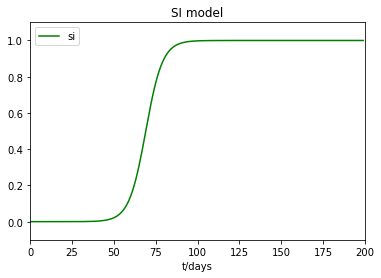

In [102]:
# Drawing

plt.title("SI model")
plt.xlabel('t/days')
plt.axis([0, tEnd, -0.1, 1.1])
plt.plot(t, ySI, '-g', label='si')
plt.legend(loc='best')
plt.show()

In [103]:
def dy_dt(y, t, lamda, mu):  # SIS model, derivative function
    dy_dt = lamda*y*(1-y) - mu*y  # di/dt = lamda*i*(1-i)-mu*i
    return dy_dt

Define the derivative function f(i,t)=λi(1-i)-μi

In [104]:
number = 1e6  # Total number of people
lamda  = 0.2  # Daily contact rate
sigma  = 2.5  # Daily cure rate
mu     = lamda/sigma  # Initial value of the proportion of people with the disease
y0     = i0 = 1e-5  # Initial value of the proportion of people with the disease
tEnd   = 200  # Predicted date length
t      = np.arange(0.0,tEnd,1)  # (start,stop,step)

Setting model parameters

In [105]:
ySI = odeint(dy_dt, y0, t, args=(lamda,0))  # SI model
ySIS = odeint(dy_dt, y0, t, args=(lamda,mu))  # SIS model

Call odeint() to find i ii in the defined intervalp [t0,t] of the numerical solution.

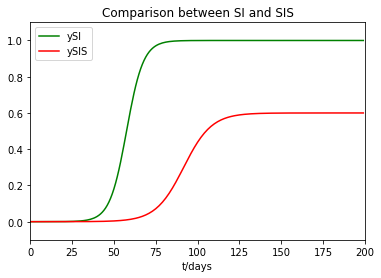

In [106]:
# Darwing

plt.title("Comparison between SI and SIS")
plt.xlabel('t/days')
plt.axis([0, tEnd, -0.1, 1.1])
plt.plot(t, ySI, '-g', label='ySI')
plt.plot(t, ySIS, '-r', label='ySIS')
plt.legend(loc='best')  
plt.show()

In [107]:
def dySIS(y,t,lamda,mu):  #SI/SIS models, derivative functions
    dy_dt = lamda*y*(1-y) -mu*y #di/dt = lamda*i*(1-i)-mu*i
    return dy_dt

In [ ]:
def dySIR(y,t,lamda,mu):  # SIR model, derivative function
    i,s = y
    di_dt = lamda*s*i - mu*i # di/dt = lamda*s*i-mu*i
    ds_dt = -lamda*s*i
    return np.array([di_dt,ds_dt])

The SIR model is a binary ordinary differential equation where the return value y is a two-dimensional array of len(t)*2

In [108]:
number = 1e6 #total population
lamda  = 0.2 #transmission rate  
sigma  = 2.5 #susceptible persons effectively exposed
mu     = lamda/sigma #Daily cure rate
tEND   = 200 #Predicted date length
t      = np.arange(0.0,tEND,1) # Gives the value of y at each moment in the time series t.
i0     = 1e-5 #Initial value of patient ratio
s0     = 1-i0 #Initial value of the vulnerability ratio
y0     = (i0,s0) #Initial values of differential equations

Setting model parameters

In [109]:
ySI  = odeint(dySIS, i0, t,args=(lamda,0))
ySIS = odeint(dySIS, i0, t,args=(lamda,mu))
ySIR = odeint(dySIR, y0, t,args=(lamda,mu))

scipy.integrate.odeint()is a specific method for solving differential equations, by numerically integrating a system of ordinary differential equations.

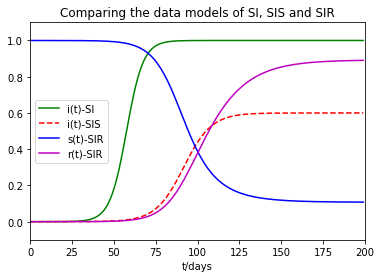

In [110]:
#Drawing
      
plt.title("Comparing the data models of SI, SIS and SIR")
plt.xlabel('t/days')
plt.axis([0,tEND,-0.1,1.1])
plt.plot(t,ySI,'-g', label='i(t)-SI')
plt.plot(t,ySIS, '--r', label='i(t)-SIS')
plt.plot(t,ySIR[:,1],'-b', label='s(t)-SIR')
plt.plot(t,1-ySIR[:,0]-ySIR[:,1], 'm', label='r(t)-SIR')
plt.legend(loc='best')
plt.show()